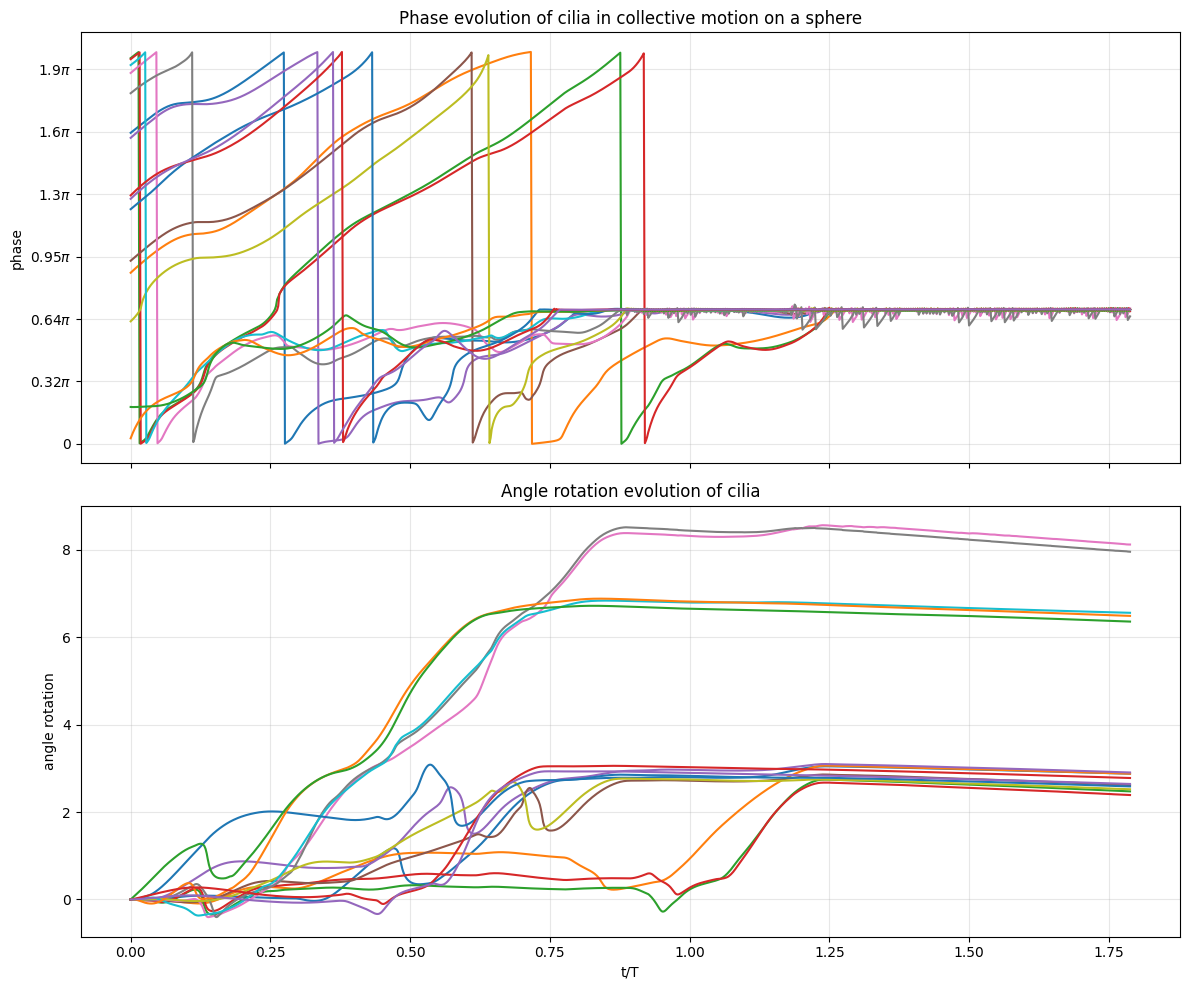

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

path = '../data/plane_random_1/20250711/ciliate_15fil_9000blob_8.00R_0.0100torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'

num_fils = 15  # Number of filaments

data = np.loadtxt(path)
time = data[:, 0] / 500.0
phases = np.mod(data[:, 2:num_fils+2], 2*np.pi)
angle_rotations = data[:, num_fils+2:num_fils*2+2]

def multiple_pi_formatter(x, pos):
  frac = x / np.pi
  if np.isclose(frac, 0):
    return "0"
  elif np.isclose(frac, 1):
    return r"$\pi$"
  elif np.isclose(frac, -1):
    return r"$-\pi$"
  elif np.isclose(frac, 2):
    return r"$2\pi$"
  elif np.isclose(frac, -2):
    return r"$-2\pi$"
  else:
    return r"${0:.2g}\pi$".format(frac)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot all phases on the first subplot
for i in range(phases.shape[1]):
    ax1.plot(time, phases[:, i], linestyle='-')

ax1.set_ylabel('phase')
ax1.set_title('Phase evolution of cilia in collective motion on a sphere')
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(FuncFormatter(multiple_pi_formatter))

# Plot all angle rotations on the second subplot
for i in range(angle_rotations.shape[1]):
    ax2.plot(time, angle_rotations[:, i], linestyle='-')

ax2.set_xlabel('t/T')
ax2.set_ylabel('angle rotation')
ax2.set_title('Angle rotation evolution of cilia')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()